# **TASK 2: IMPLEMENT A DEEP LEARNING MODEL**

In [ ]:
!pip install tensorflow keras numpy pandas matplotlib nltk

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/imdb_top_1000.csv')

In [ ]:
# Data cleaning and preprocessing
# Convert 'Gross' to numeric (remove commas and dollar signs)
df['Gross'] = df['Gross'].str.replace(',', '').str.replace('$', '').astype(float)

# Convert 'Runtime' to numeric (remove 'min')
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

# Convert 'No_of_Votes' to numeric (it's already clean)
df['No_of_Votes'] = pd.to_numeric(df['No_of_Votes'])

# Convert 'Released_Year' to numeric (handle any non-numeric values)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

In [ ]:
# Basic info about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    float64
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 125.1+ KB
None

First 5 rows:
   

In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Released_Year      Runtime  IMDB_Rating  Meta_score   No_of_Votes  \
count     999.000000  1000.000000  1000.000000  843.000000  1.000000e+03   
mean     1991.217217   122.891000     7.949300   77.971530  2.736929e+05   
std        23.297025    28.093671     0.275491   12.376099  3.273727e+05   
min      1920.000000    45.000000     7.600000   28.000000  2.508800e+04   
25%      1976.000000   103.000000     7.700000   70.000000  5.552625e+04   
50%      1999.000000   119.000000     7.900000   79.000000  1.385485e+05   
75%      2009.000000   137.000000     8.100000   87.000000  3.741612e+05   
max      2020.000000   321.000000     9.300000  100.000000  2.343110e+06   

              Gross  
count  8.310000e+02  
mean   6.803475e+07  
std    1.097500e+08  
min    1.305000e+03  
25%    3.253559e+06  
50%    2.353089e+07  
75%    8.075089e+07  
max    9.366622e+08  


In [ ]:
# Analysis 1: Top 10 Highest Rated Movies
top_rated = df.sort_values('IMDB_Rating', ascending=False).head(10)
print("\nTop 10 Highest Rated Movies:")
print(top_rated[['Series_Title', 'IMDB_Rating', 'Director', 'Released_Year']])


Top 10 Highest Rated Movies:
                                     Series_Title  IMDB_Rating  \
0                        The Shawshank Redemption          9.3   
1                                   The Godfather          9.2   
4                                    12 Angry Men          9.0   
2                                 The Dark Knight          9.0   
3                          The Godfather: Part II          9.0   
5   The Lord of the Rings: The Return of the King          8.9   
7                                Schindler's List          8.9   
6                                    Pulp Fiction          8.9   
8                                       Inception          8.8   
12                Il buono, il brutto, il cattivo          8.8   

                Director  Released_Year  
0         Frank Darabont         1994.0  
1   Francis Ford Coppola         1972.0  
4           Sidney Lumet         1957.0  
2      Christopher Nolan         2008.0  
3   Francis Ford Coppola         

In [ ]:
# Analysis 2: Movies with Highest Gross Earnings
top_grossing = df.sort_values('Gross', ascending=False).head(10)
print("\nTop 10 Highest Grossing Movies:")
print(top_grossing[['Series_Title', 'Gross', 'Director', 'Released_Year']])


Top 10 Highest Grossing Movies:
                                   Series_Title        Gross  \
477  Star Wars: Episode VII - The Force Awakens  936662225.0   
59                            Avengers: Endgame  858373000.0   
623                                      Avatar  760507625.0   
60                       Avengers: Infinity War  678815482.0   
652                                     Titanic  659325379.0   
357                                The Avengers  623279547.0   
891                               Incredibles 2  608581744.0   
2                               The Dark Knight  534858444.0   
582                                   Rogue One  532177324.0   
63                        The Dark Knight Rises  448139099.0   

              Director  Released_Year  
477        J.J. Abrams         2015.0  
59       Anthony Russo         2019.0  
623      James Cameron         2009.0  
60       Anthony Russo         2018.0  
652      James Cameron         1997.0  
357        Joss Whedon

In [ ]:
# Analysis 3: Most Common Genres
# Split genres and count occurrences
genres = df['Genre'].str.split(', ').explode()
genre_counts = genres.value_counts().head(10)
print("\nTop 10 Most Common Genres:")
print(genre_counts)


Top 10 Most Common Genres:
Genre
Drama        724
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Name: count, dtype: int64


In [ ]:
# Analysis 4: Directors with Most Top-Rated Movies
director_counts = df['Director'].value_counts().head(10)
print("\nTop 10 Directors with Most Movies in Top 1000:")
print(director_counts)


Top 10 Directors with Most Movies in Top 1000:
Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Akira Kurosawa       10
Martin Scorsese      10
Woody Allen           9
Stanley Kubrick       9
Billy Wilder          9
Clint Eastwood        8
Christopher Nolan     8
Name: count, dtype: int64


In [ ]:
# Analysis 5: Year-wise Movie Count
year_counts = df['Released_Year'].value_counts().sort_index()
print("\nNumber of Top Movies Released Each Year:")
print(year_counts.tail(20))  # Show recent years


Number of Top Movies Released Each Year:
Released_Year
2001.0    27
2002.0    19
2003.0    22
2004.0    31
2005.0    17
2006.0    26
2007.0    26
2008.0    21
2009.0    29
2010.0    23
2011.0    18
2012.0    24
2013.0    28
2014.0    32
2015.0    25
2016.0    28
2017.0    22
2018.0    19
2019.0    23
2020.0     6
Name: count, dtype: int64


In [ ]:
# Analysis 6: Runtime Analysis
print("\nRuntime Statistics:")
print(df['Runtime'].describe())


Runtime Statistics:
count    1000.000000
mean      122.891000
std        28.093671
min        45.000000
25%       103.000000
50%       119.000000
75%       137.000000
max       321.000000
Name: Runtime, dtype: float64


In [ ]:
# Analysis 7: Certificate Distribution
cert_counts = df['Certificate'].value_counts()
print("\nCertificate Distribution:")
print(cert_counts)


Certificate Distribution:
Certificate
U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
Unrated       1
TV-MA         1
16            1
U/A           1
Name: count, dtype: int64


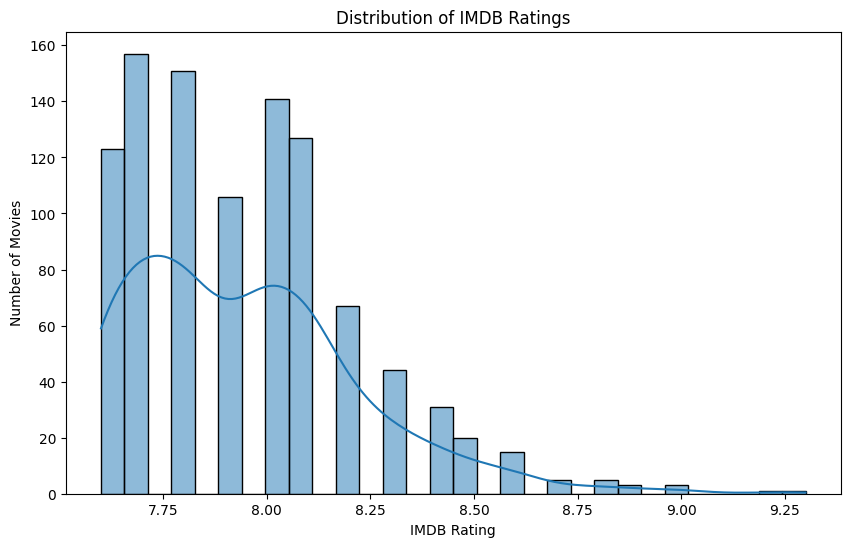

In [ ]:
# Visualization 1: IMDB Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], bins=30, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Movies')
plt.show()

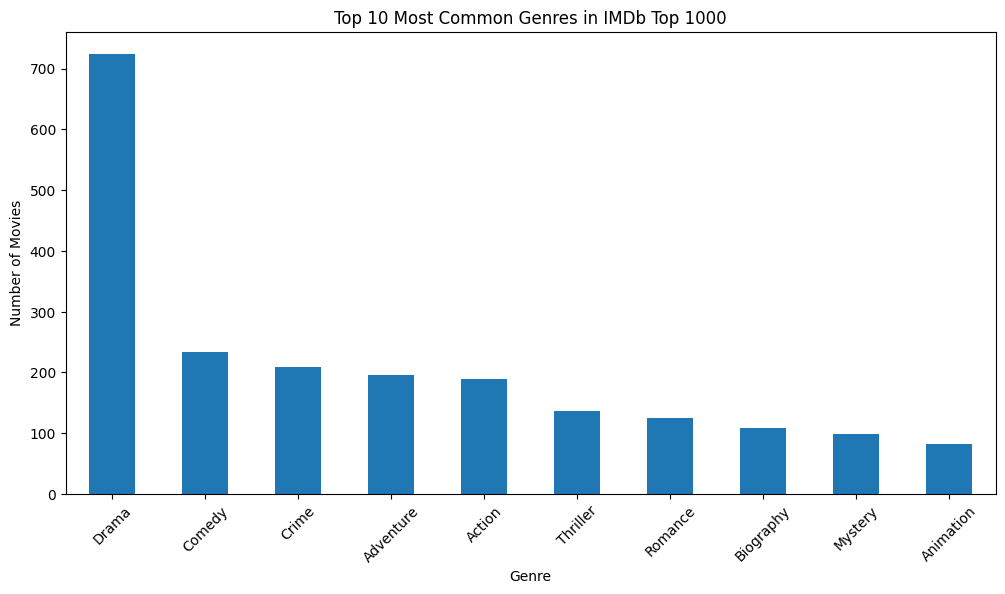

In [ ]:
# Visualization 2: Top Genres
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Top 10 Most Common Genres in IMDb Top 1000')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

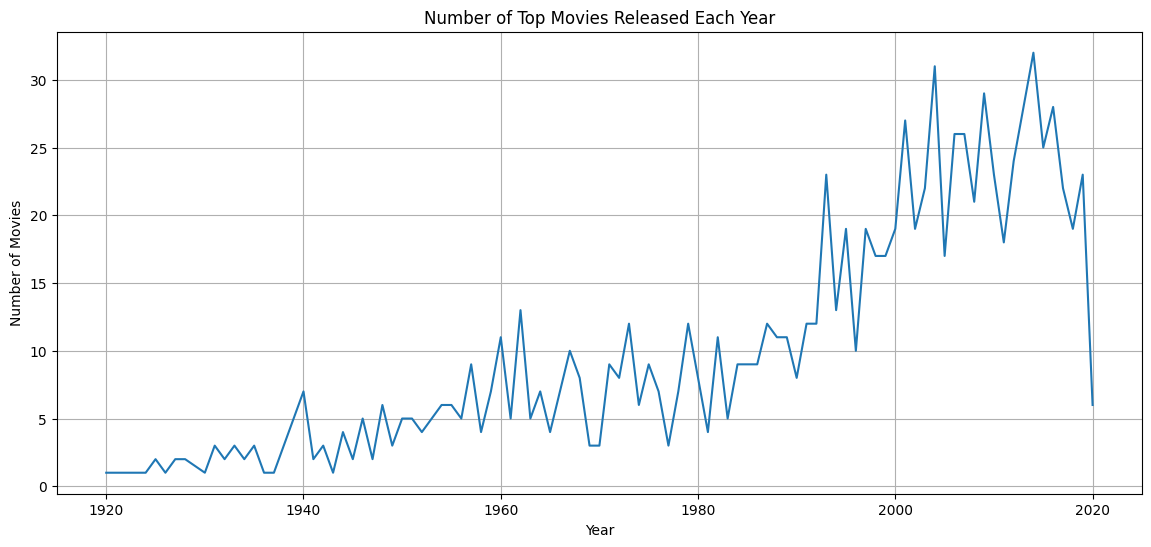

In [ ]:
# Visualization 3: Movies Released by Year
plt.figure(figsize=(14, 6))
year_counts.plot()
plt.title('Number of Top Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

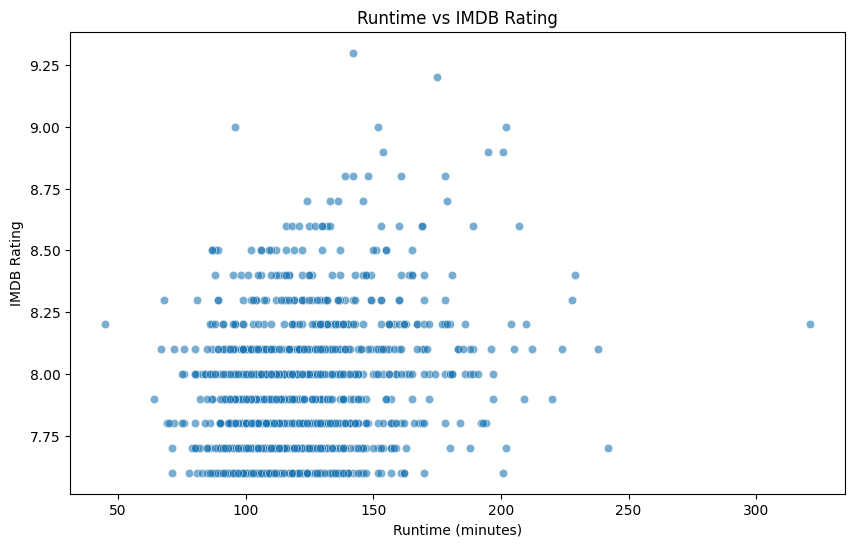

In [ ]:
# Visualization 4: Runtime vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime', y='IMDB_Rating', data=df, alpha=0.6)
plt.title('Runtime vs IMDB Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Rating')
plt.show()

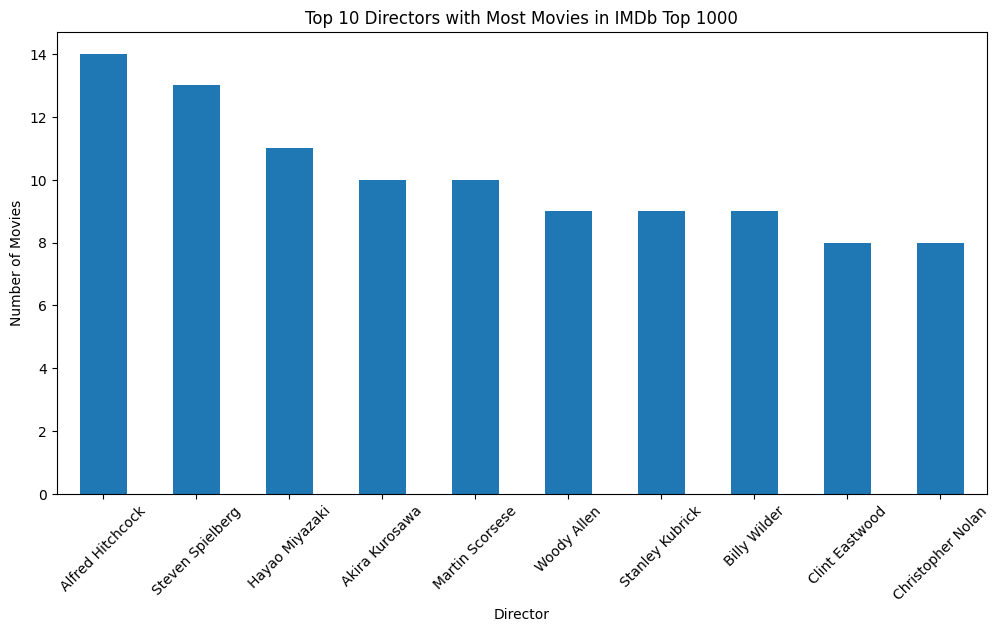

In [ ]:
# Visualization 5: Top Directors
plt.figure(figsize=(12, 6))
director_counts.plot(kind='bar')
plt.title('Top 10 Directors with Most Movies in IMDb Top 1000')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

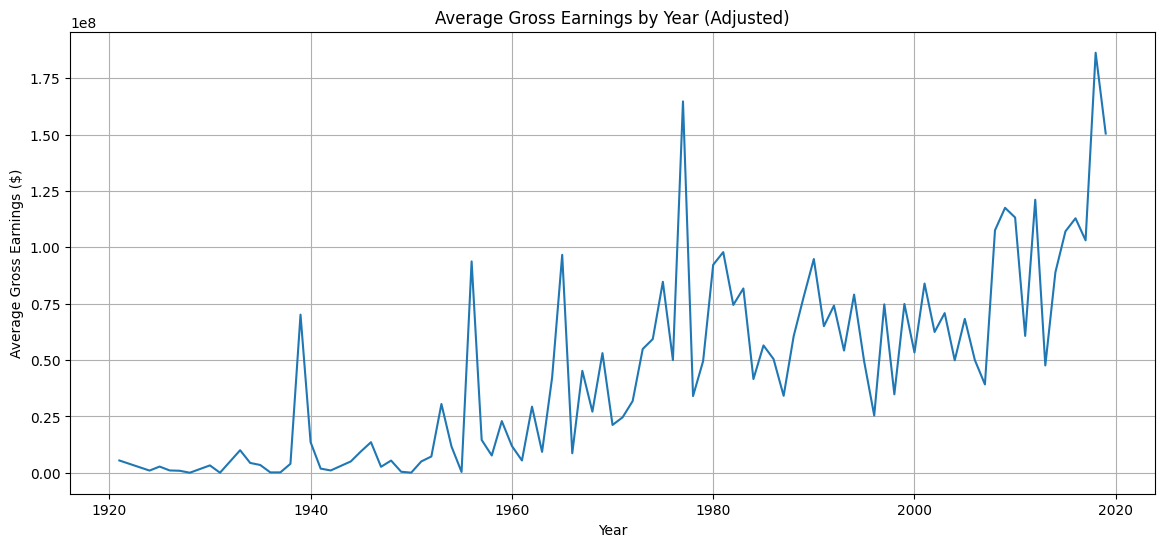

In [ ]:
# Visualization 6: Gross Earnings by Year (only for movies with gross data)
gross_by_year = df.dropna(subset=['Gross']).groupby('Released_Year')['Gross'].mean()
plt.figure(figsize=(14, 6))
gross_by_year.plot()
plt.title('Average Gross Earnings by Year (Adjusted)')
plt.xlabel('Year')
plt.ylabel('Average Gross Earnings ($)')
plt.grid(True)
plt.show()

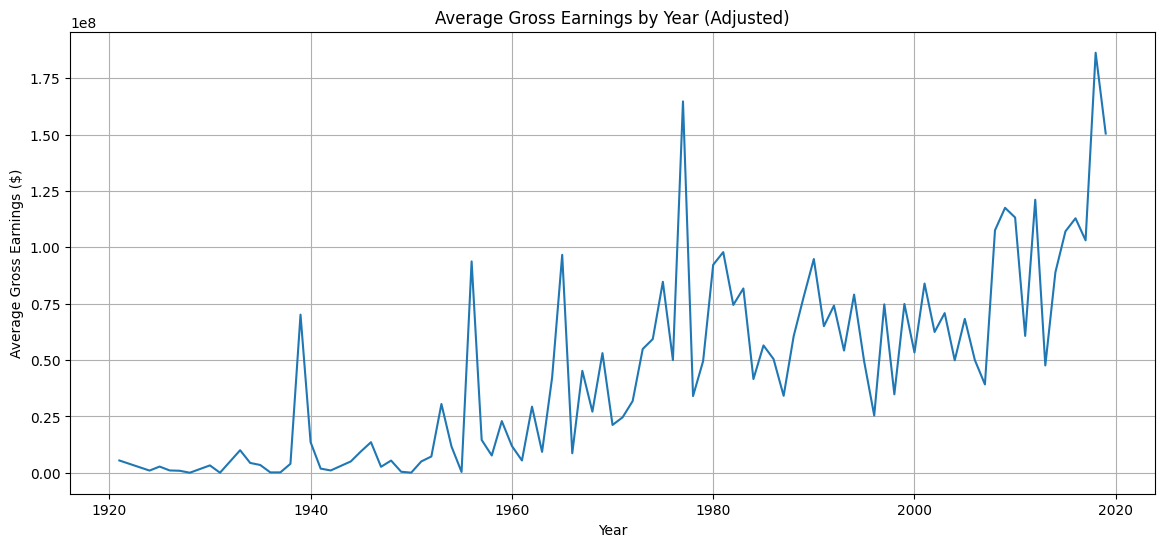

In [ ]:
# Visualization 6: Gross Earnings by Year (only for movies with gross data)
gross_by_year = df.dropna(subset=['Gross']).groupby('Released_Year')['Gross'].mean()
plt.figure(figsize=(14, 6))
gross_by_year.plot()
plt.title('Average Gross Earnings by Year (Adjusted)')
plt.xlabel('Year')
plt.ylabel('Average Gross Earnings ($)')
plt.grid(True)
plt.show()